# Data Visualization and Analysis

**Seaborn** is a data visualization library in Python. It helps to create interesting and interactive plots to draw meaningful information from data.

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

In [3]:
file_path = r'CSV\authors_gs.csv'
df = pd.read_csv(file_path)

In [4]:
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Author`s data analysis

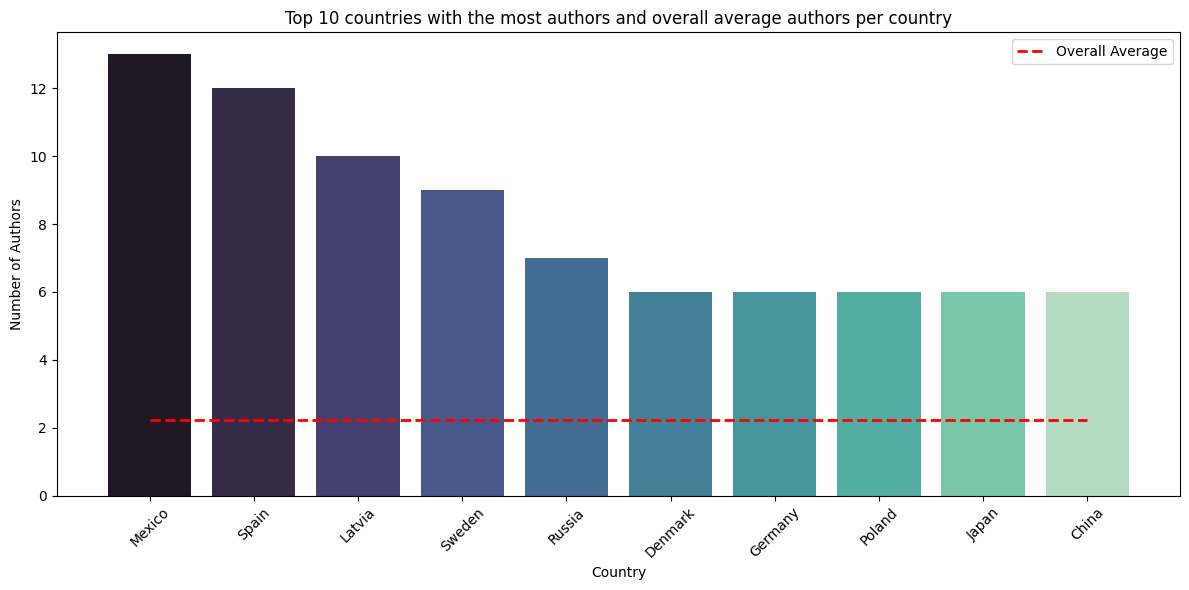

In [42]:
# Get the top 10 countries with the most authors and sort them by count in descending order
top_countries = df['country'].value_counts().head(10).index
df_top_countries = df[df['country'].isin(top_countries)]
df_top_countries_counts = df_top_countries['country'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)

# Calculate the average number of authors per country
df_avg = df.groupby('country')['authors_id'].count().reset_index(name='average_count')
avg_all_countries = df_avg['average_count'].mean()

# Use Seaborn to create a bar plot with the 'mako' color palette
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='count', data=df_top_countries_counts, palette='mako')
sns.lineplot(x='country', y=avg_all_countries, data=df_top_countries_counts, color='red', linestyle='dashed', linewidth=2, label='Overall Average')

# Set plot labels and title
plt.xlabel('Country')
plt.ylabel('Number of Authors')
plt.title('Top 10 countries with the most authors and overall average authors per country')

# Show the plot with a legend
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()
plt.show()

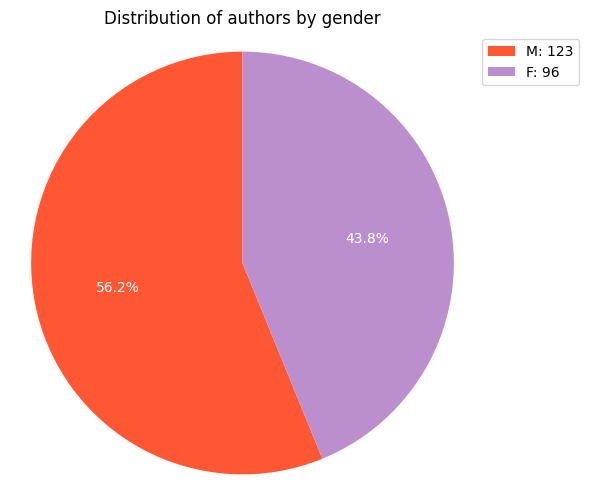

In [48]:
# Calculate the distribution of authors by gender
gender_distribution = df['gender'].value_counts()

# Plot a smaller pie chart with different colors
plt.figure(figsize=(6, 6))
colors = ['#FF5733', '#BB8FCE']  # Customize colors
wedges, texts, autotexts = plt.pie(gender_distribution, labels=None, autopct='%1.1f%%', startangle=90, colors=colors, textprops=dict(color="w"))

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Set title
plt.title('Distribution of authors by gender')

# Add legend with actual count of authors
plt.legend(gender_distribution.index + ': ' + gender_distribution.astype(str), loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

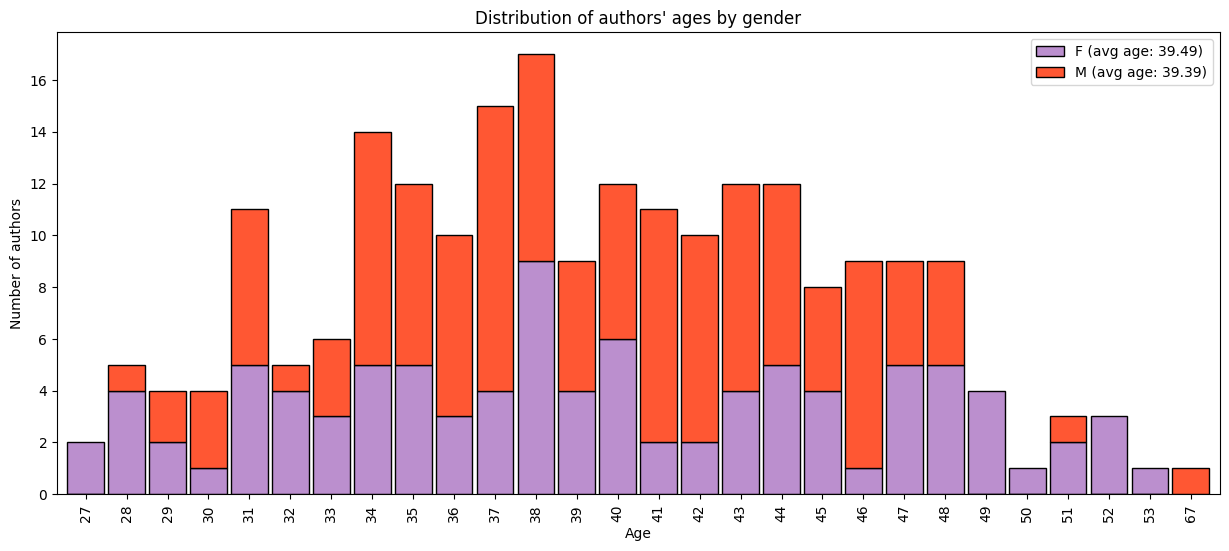

In [81]:
# Calculate the average age for each gender
avg_age_by_gender = df.groupby('gender')['age'].mean()

# Plot a stacked bar plot of authors' ages with counts of male (M) and female (F) authors
plt.figure(figsize=(15, 6))

# Create a DataFrame with counts of male and female authors for each age
gender_counts = df.groupby(['age', 'gender']).size().unstack(fill_value=0)
colors = {'F': '#BB8FCE', 'M': '#FF5733'}  # Custom colors for female and male

# Plot the stacked bar plot with custom colors
gender_counts.plot(kind='bar', stacked=True, width=0.9, color=[colors[col] for col in gender_counts.columns], edgecolor='black', ax=plt.gca())

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Number of authors')
plt.title('Distribution of authors\' ages by gender')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Customize the legend with average age for each gender
legend_labels = [f'{col} (avg age: {avg_age_by_gender[col]:.2f})' for col in gender_counts.columns]
plt.legend(labels=legend_labels)

# Show the plot
plt.show()



# Book analysis

In [7]:
url= 'https://raw.githubusercontent.com/AnceSoko/DBA/main/book_analysis_view.csv'
df = pd.read_csv(url)

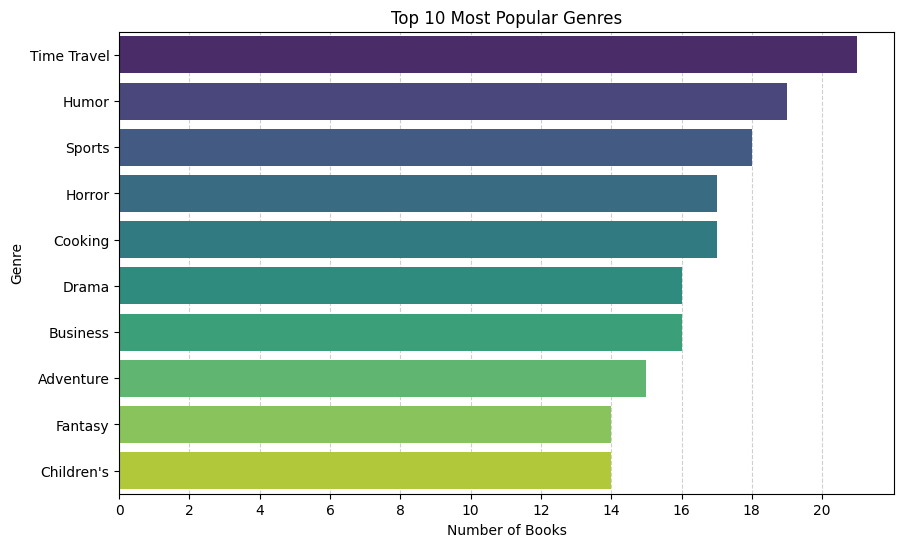

In [35]:
# Get the top 10 genres and their counts
top_genres = df['genre_name'].value_counts().head(10)

# Convert counts to integers
top_genres = top_genres.astype(int)

plt.figure(figsize=(10, 6))

# Set the bars with a lower zorder
ax = sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis', zorder=2)

plt.title('Top 10 Most Popular Genres')
plt.xlabel('Number of Books')
plt.ylabel('Genre')

# Manually set the tick locations on the x-axis
tick_interval = 2
plt.xticks(range(0, max(top_genres.values) + 1, tick_interval))

# Add a grid behind the bars
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)

plt.show()

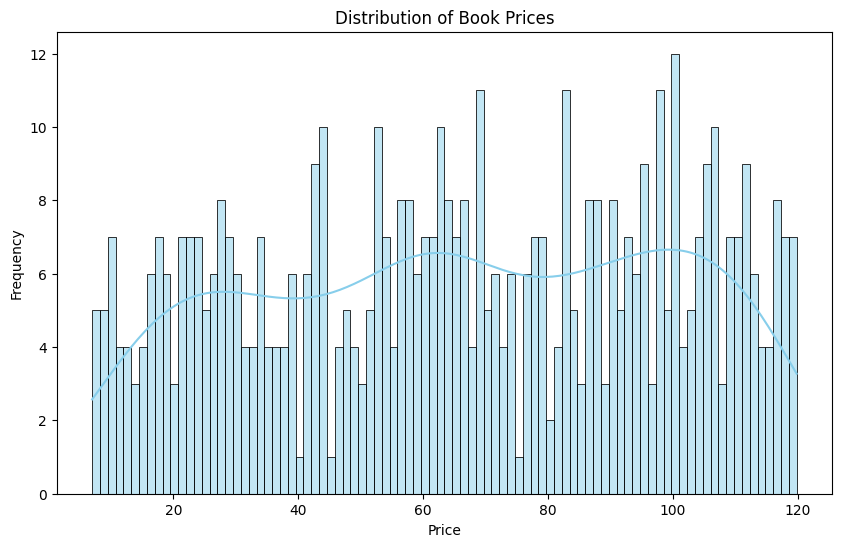

In [38]:
# Plot a histogram of book prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=90, kde=True, color='skyblue')
plt.title('Distribution of Book Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()